##SET UP ##

Importing files and functions needed

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

Preperation - loading data

In [2]:
data = load_iris().data[0:100, 0:2] #first 100 datas, considering the first 2 dimensions
target = load_iris().target[0:100]

##3.1##
Implement a binary linear classifier on the first two dimensions (sepal length and width) of the iris dataset and plot its decision boundary.

Text(0.5, 69.00000000000009, '$x_1$')

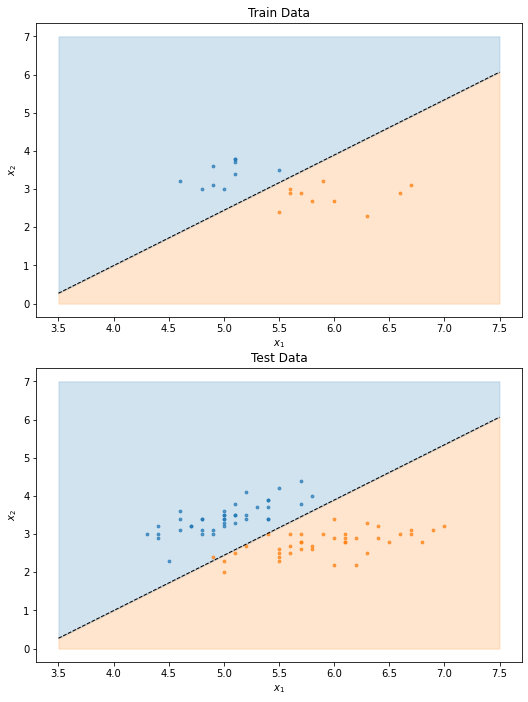

In [3]:
# Split data
train_data, test_data = train_test_split(data, test_size=0.8, random_state=0)
train_target, test_target = train_test_split(target, test_size=0.8, random_state=0)

# Fit the data to a logistic regression model
binary_lin_classifier = LogisticRegression(random_state=0).fit(train_data, train_target) #http://scikit-learn.org/stable/modules/linear_model.html

# Get Parameters
w1, w2 = binary_lin_classifier.coef_.T
b = binary_lin_classifier.intercept_[0]

# For later question
w_logistic = w1, w2
b_logistic = b

# Intercept and Gradient of the decision boundary
# Weights = coordinates of a vector which is orthogonal to the hyperplane
# => trying to put into a linear line form, y = mx + b
c = -b/w2
m = -w1/w2


x_lower, x_upper = 3.5, 7.5
y_lower, y_upper = 0, 7

x_domain = np.array([x_lower, x_upper])
y_domain = m*x_domain + c

fig, (plt1, plt2) = plt.subplots(2, figsize=(8,10))
fig.tight_layout(pad= 3)

# PLT1
plt1.plot(x_domain, y_domain, 'k', lw=1, ls='--')
plt1.fill_between(x_domain, y_domain, y_lower, color='tab:orange', alpha=0.2)
plt1.fill_between(x_domain, y_domain, y_upper, color='tab:blue', alpha=0.2)

plt1.scatter(*train_data[train_target==0].T, s=8, alpha=0.7)
plt1.scatter(*train_data[train_target==1].T, s=8, alpha=0.7)
plt1.set_title("Train Data")
plt1.set_ylabel(r'$x_2$')
plt1.set_xlabel(r'$x_1$')


# PLT2
plt2.plot(x_domain, y_domain, 'k', lw=1, ls='--')
plt2.fill_between(x_domain, y_domain, y_lower, color='tab:orange', alpha=0.2)
plt2.fill_between(x_domain, y_domain, y_upper, color='tab:blue', alpha=0.2)

plt2.scatter(*test_data[test_target==0].T, s=8, alpha=0.7)
plt2.scatter(*test_data[test_target==1].T, s=8, alpha=0.7)
plt2.set_title("Test Data")
plt2.set_ylabel(r'$x_2$')
plt2.set_xlabel(r'$x_1$')



##3.2##
Report the accuracy of your binary linear classifier on both the training and test sets.

In [ ]:
# accuracy of your binary linear classifier
acc_train_score = accuracy_score(train_target, binary_lin_classifier.predict(train_data)) 
print('linear_train_acc_score:', acc_train_score)
acc_test_score = accuracy_score(test_target, binary_lin_classifier.predict(test_data)) 
print('linear_test_acc_score:', acc_test_score) #little training it had, doesn't have 1.0 accuracy for the test

linear_train_acc_score: 1.0
linear_test_acc_score: 0.9875


##3.3##
Implement a linear SVM classifier on the first two dimensions (sepal length and width). Plot the decision boundary of the classifier and its margins.

Text(63.125, 0.5, 'x2')

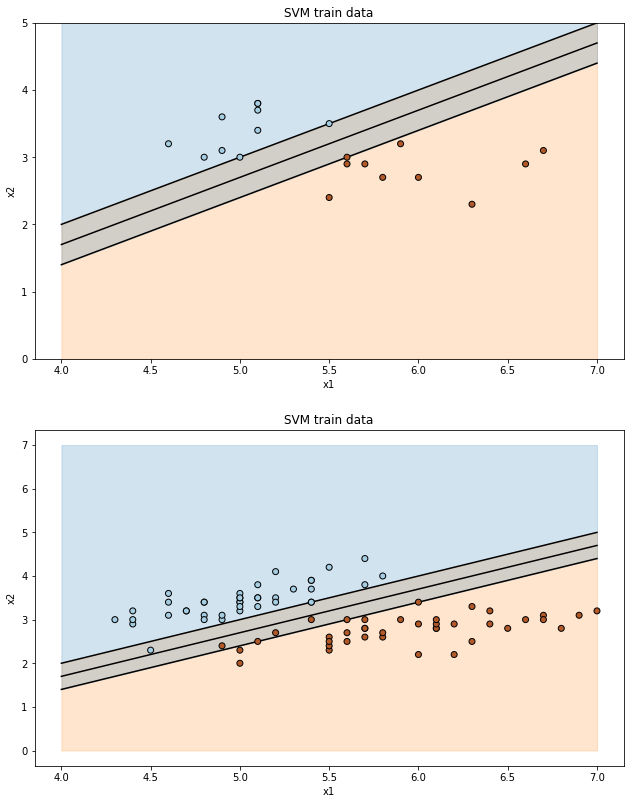

In [ ]:
# Split data
train_data, test_data = train_test_split(data, test_size=0.8, random_state=0)
train_target, test_target = train_test_split(target, test_size=0.8, random_state=0)

x_lower, x_upper = 3.5, 7.5
y_lower, y_upper = 0, 7

# SVM
SVM_clf = svm.SVC(kernel= 'linear', C=1000)
SVM_clf.fit(train_data, train_target)

# Get Parameters
w = SVM_clf.coef_[0]
b = SVM_clf.intercept_[0]

# For later question saving variable
w_SVM = w
b_SVM = b

# gradient
m = -w[0] / w[1]
xx = np.linspace(4, 7)
# y = mx + b form 
yy = m * xx - (SVM_clf.intercept_[0]) / w[1]

# Margin Lines
margin = 1 / np.sqrt(np.sum(SVM_clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

fig, (plt1, plt2) = plt.subplots(2, figsize=(10,12))
fig.tight_layout(pad = 5)

# PLT1
plt1.fill_between(xx, yy_up, y_lower, color='tab:orange', alpha=0.2)
plt1.fill_between(xx, yy_down, y_upper, color='tab:blue', alpha=0.2)
plt1.plot(xx, yy, "k-")
plt1.plot(xx, yy_down, "k-")
plt1.plot(xx, yy_up, "k-")

plt1.scatter(train_data[:, 0], train_data[:, 1], c=train_target, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
plt1.set_title("SVM train data")
plt1.set_xlabel(r'$x_1$')
plt1.set_ylabel(r'$x_2$')


# PLT2
plt2.fill_between(xx, yy_up, y_lower, color='tab:orange', alpha=0.2)
plt2.fill_between(xx, yy_down, y_upper, color='tab:blue', alpha=0.2)
plt2.plot(xx, yy, "k-")
plt2.plot(xx, yy_down, "k-")
plt2.plot(xx, yy_up, "k-")

plt2.scatter(test_data[:, 0], test_data[:, 1], c=test_target, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
plt2.set_title("SVM train data")
plt2.set_xlabel(r'$x_1$')
plt2.set_ylabel(r'$x_2$')



##3.4## 
Circle the support vectors. Please justify how to identify them through the duality theorem

Duality theorm allows the optimization problems to be viewed from two perspective. This allows us to switch between the max and min to make calculations easier. There are couple conditions to be met for this theorem to be used to solve for the equation. When applying duality principle,  "duality gap" is formed between P* (the minimizer of the primal objective P) and D* (the maximizer for the dual objective D). This gap is zero if the slater condition is met. (We say strong duality holds). When there is a zero duality gap, then we can say the solution satisfies the KKT conditions. If it does satisfy the KKT condition, we can conclude that D* is a dual soltuion of P*.

From part 1, we know we have the KKT condition as $$\alpha_i(1-y_i(\beta^Tx_i + b)) = 0$$

We know that there are two possible cases. 
- $\alpha_i=0$ 
- $1-y_i(\beta^Tx_i + b) = 0 \Rightarrow y_i(\beta^Tx_i + b) = 1 $

For case 1, this tells the $1-y_i(\beta^Tx_i + b) \geq 1 $. This implies that if the point is not a support vector it has $\alpha_i=0$ 

For case 2, it implies $\alpha_i > 0$. This means that the point x_i is a support vector. 

As above, using the KKT condition, we can solve for the support vector. 








SVM_acc_train_score 1.0
SVM_acc_test_score 1.0


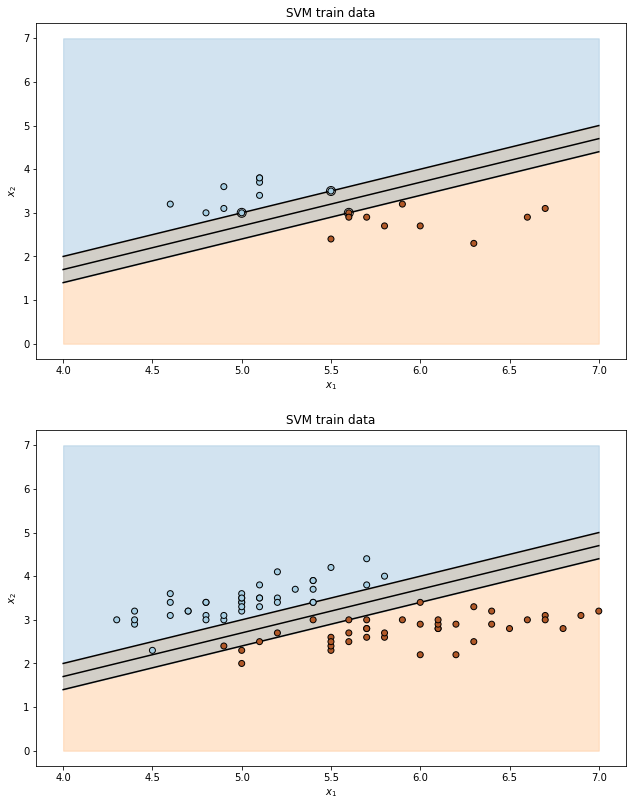

In [4]:
# Split data
train_data, test_data = train_test_split(data, test_size=0.8, random_state=0)
train_target, test_target = train_test_split(target, test_size=0.8, random_state=0)

x_lower, x_upper = 3.5, 7.5
y_lower, y_upper = 0, 7

# SVM
SVM_clf = svm.SVC(kernel= 'linear', C=1000)
SVM_clf.fit(train_data, train_target)

# Get Parameters
w = SVM_clf.coef_[0]
b = SVM_clf.intercept_[0]

# Gradient
m = -w[0] / w[1]
xx = np.linspace(4, 7)
# y = mx + b form
yy = m * xx - (SVM_clf.intercept_[0]) / w[1]

# To draw margin 
margin = 1 / np.sqrt(np.sum(SVM_clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# PLOTTING
fig, (plt1, plt2) = plt.subplots(2, figsize=(10,12))
fig.tight_layout(pad = 5)

# PLT1 - train data
plt1.fill_between(xx, yy_up, y_lower, color='tab:orange', alpha=0.2)
plt1.fill_between(xx, yy_down, y_upper, color='tab:blue', alpha=0.2)
plt1.plot(xx, yy, "k-")
plt1.plot(xx, yy_down, "k-")
plt1.plot(xx, yy_up, "k-")

plt1.scatter(SVM_clf.support_vectors_[:, 0], SVM_clf.support_vectors_[:, 1], s=80, facecolors="none", zorder=10, edgecolors="k")
plt1.scatter(train_data[:, 0], train_data[:, 1], c=train_target, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
plt1.set_title("SVM train data")
plt1.set_xlabel(r'$x_1$')
plt1.set_ylabel(r'$x_2$')


# PLT2 - test data
plt2.fill_between(xx, yy_up, y_lower, color='tab:orange', alpha=0.2)
plt2.fill_between(xx, yy_down, y_upper, color='tab:blue', alpha=0.2)
plt2.plot(xx, yy, "k-")
plt2.plot(xx, yy_down, "k-")
plt2.plot(xx, yy_up, "k-")

# Support vector used to find the margin - the hyperparameter. 
# Fitting the test dataset onto the margin found through support vectors in train set. 
# No support vector highlighted here. 
plt2.scatter(test_data[:, 0], test_data[:, 1], c=test_target, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
plt2.set_title("SVM train data")
plt2.set_xlabel(r'$x_1$')
plt2.set_ylabel(r'$x_2$')

##3.5##
Report the accuracy of your linear SVM classifier on both the training and
test set

###WORK####

In [ ]:
# Accuracy
SVM_acc_train = accuracy_score(train_target, SVM_clf.predict(train_data)) 
print('SVM_acc_train_score', SVM_acc_train)
SVM_test_acc = accuracy_score(test_target, SVM_clf.predict(test_data)) 
print('SVM_acc_test_score', SVM_test_acc)

SVM_acc_train_score 1.0
SVM_acc_test_score 1.0


##3.6##
##AMY##
What is the value of the margin? Justify your answer.


In [ ]:
print('margin:', margin)
mag_w = pow((pow(w1,2) + pow(w2,2)),1/2)
print('mag_w:', mag_w)
print('1/(mag_w):', 1/mag_w)

margin: 0.21215037731981262
mag_w: [2.19043298]
1/(mag_w): [0.45653074]



From the lecture, we know 
$ margin = \frac{1}{||w||} = \frac{1}{\sqrt{w_1^2 + w_2^2}}$ 

So, to verify the margin I get from the algorithm, I manually calculated the magnitude of the weight and divided by one to compare. The two agreed which varifies the values of the margin. 


##3.7##
Which vector is orthogonal to the decision boundary?

Based on the lecture note, $\bar{w}$ is orthogonal to the decision boundary.

##3.8##
Split the iris dataset again in a training and test set, this time setting test size to 0.4 when calling train test split. Train the SVM classifier again. Does the decision boundary change? How about the test accuracy? Please justify why (hint: think about the support vectors), and illustrate your argument with a new plot.

Support vector is used to get the max margin. However, now the train data have changed to include more. As a result, with different datas taking into account for finding the max margin, the boundary must have changed. The test accuracies are the same with 1.0. However, we can see the difference in the test data graphs. Previously we were training with insufficient amount of training datas. As a result, we were not finding the max margin that covers the scope of test data. So on the test graph, we see points that go inside the margin. On the other hand, now with a greater amount of training datas, it finds a better max margin. So for the updated SVM test data graph, there are no points that go inside the margin. Even though numerical accuracies don't tell, this can be viewed through the graphs of test data. 


Updated_SVM_acc_train_score 1.0
Updated_SVM_acc_test_score 1.0


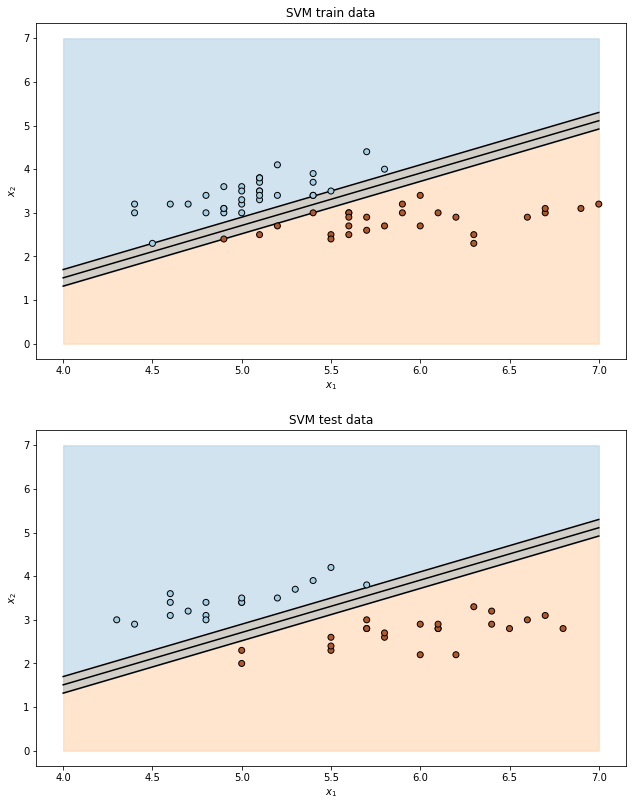

In [6]:
data = load_iris().data[0:100, 0:2] #first 100 datas, considering the first 2 dimensions
target = load_iris().target[0:100]

train_data, test_data = train_test_split(data, test_size=0.4, random_state=0)
train_target, test_target = train_test_split(target, test_size=0.4, random_state=0)

x_lower, x_upper = 3.5, 7.5
y_lower, y_upper = 0, 7

# SVM
SVM_clf_updated = svm.SVC(kernel= 'linear', C=1000)
SVM_clf_updated.fit(train_data, train_target)

# Get Parameters
w = SVM_clf_updated.coef_[0]
b = SVM_clf_updated.intercept_[0]

updated_SVM_w = w
updated_SVM_b = b

# Gradient
m = -w[0] / w[1]
xx = np.linspace(4, 7)
# y = mx + b form
yy = m * xx - (SVM_clf_updated.intercept_[0]) / w[1]

# To draw margins 
margin = 1 / np.sqrt(np.sum(SVM_clf_updated.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

fig, (plt1, plt2) = plt.subplots(2, figsize=(10,12))
fig.tight_layout(pad = 5)

# PLT1
plt1.fill_between(xx, yy_up, y_lower, color='tab:orange', alpha=0.2)
plt1.fill_between(xx, yy_down, y_upper, color='tab:blue', alpha=0.2)
plt1.plot(xx, yy, "k-")
plt1.plot(xx, yy_down, "k-")
plt1.plot(xx, yy_up, "k-")

plt1.scatter(train_data[:, 0], train_data[:, 1], c=train_target, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
plt1.set_title("SVM train data")
plt1.set_xlabel(r'$x_1$')
plt1.set_ylabel(r'$x_2$')

# PLT2
plt2.fill_between(xx, yy_up, y_lower, color='tab:orange', alpha=0.2)
plt2.fill_between(xx, yy_down, y_upper, color='tab:blue', alpha=0.2)
plt2.plot(xx, yy, "k-")
plt2.plot(xx, yy_down, "k-")
plt2.plot(xx, yy_up, "k-")

plt2.scatter(test_data[:, 0], test_data[:, 1], c=test_target, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
plt2.set_title("SVM test data")
plt2.set_xlabel(r'$x_1$')
plt2.set_ylabel(r'$x_2$')

# Accuracy
updated_SVM_acc = accuracy_score(train_target, SVM_clf_updated.predict(train_data)) 
print('Updated_SVM_acc_train_score', updated_SVM_acc)
update_SVM_acc = accuracy_score(test_target, SVM_clf_updated.predict(test_data)) 
print('Updated_SVM_acc_test_score', update_SVM_acc)



##9##
Do the binary linear classifier and SVM have the same decision boundaries?

No, they don't. Showing w and b values for different model (or different amount of dataset used to train). The w vector is orthogonal to the boundary. The b values are also all different.  


In [ ]:
print('w of logistic regression:', [w_logistic[0][0], w_logistic[1][0]])
print('b of logistic regression:', b_logistic, "\n")

print('w of SVM with testing=0.4:', w_SVM)
print('b of SVM with testing=0.4:', b_SVM, "\n")

print('b of SVM with testing=0.8:',updated_SVM_w)
print('b of SVM with testing=0.8:',updated_SVM_b)

w of logistic regression: [1.802261622714657, -1.2449295937797127]
b of logistic regression: -5.968527502942985 

w of SVM with testing=0.4: [ 3.33266363 -3.33342658]
b of SVM with testing=0.4: -7.662778452658107 

b of SVM with testing=0.8: [ 6.31804679 -5.26503723]
b of SVM with testing=0.8: -17.32197688065553


##10##
Now consider all 150 entries in the iris dataset, and retrain the SVM. You should find that the data points are not linearly separable. How can you deal with it? Justify your answer and plot the decision boundary of your new proposed classifier.

The last 50 entries are no longer 2 dimensional. Also, plotting out the datas, we can see that linear classification will not sort them. So I went to look for non-linear models. Understanding how the datas are organized, I chose to use RBF kernel. According to the documentation, RBF does non-linear classification by putting the samples onto a higher dimension feature space and applying linear decision boundary. This seemed like the most appropriate model for given data, therefore I chose this. 

Text(0, 0.5, 'Sepal width')

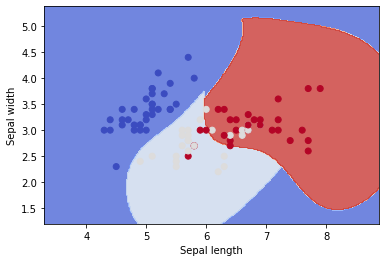

In [ ]:
data = load_iris().data[0:150, 0:2] # 150 datas, considering the first 2 dimensions
target = load_iris().target[0:150]

train_data, test_data = train_test_split(data, test_size=0.4, random_state=0)
train_target, test_target = train_test_split(target, test_size=0.4, random_state=0)

# RBF
rbf_svc = svm.SVC(kernel='rbf', gamma=0.8, C=10).fit(train_data, train_target)
# C = Inverse of the strength of regularization. increases => overfits.
# gamma = increases the model gets overfits / decreases the model underfits.

h = .02  # step size in the mesh
 
# create a mesh to plot in
x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  
Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
# Plot also the training points
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_target, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [ ]:
# Accuracy
RBF_acc = accuracy_score(train_target, rbf_svc.predict(train_data)) 
print('Updated_SVM_acc_train_score', RBF_acc)
RBF_acc = accuracy_score(test_target, rbf_svc.predict(test_data)) 
print('Updated_SVM_acc_test_score', RBF_acc)

Updated_SVM_acc_train_score 0.8444444444444444
Updated_SVM_acc_test_score 0.7333333333333333
